In [1]:
import pandas as pd
import numpy as np
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

# Download

In [2]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [3]:
test_ID = test['Id']

In [4]:
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [5]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
len(train.columns)

80

## Outliers

In [7]:
import matplotlib.pyplot as plt

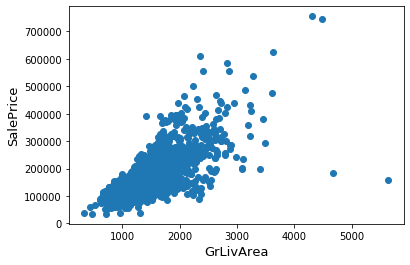

In [8]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [9]:
# dropping them
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']>60000)].index, inplace=True)

In [10]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


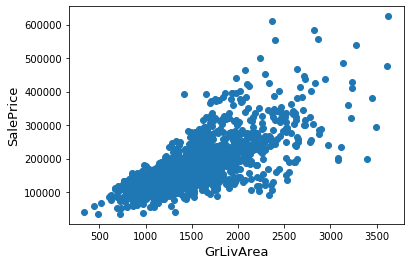

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## Target variable

In [12]:
from scipy import stats
from scipy.stats import norm, skew
import seaborn as sns

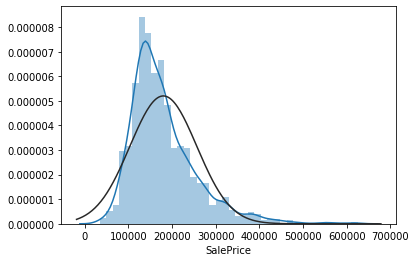

In [13]:
sns.distplot(train['SalePrice'], fit = norm)

SKEWED

**We need to make it normaly distributed**

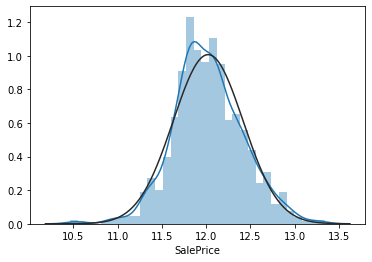

In [14]:
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'] , fit=norm);

## Feature engineering

In [15]:
Target = train.SalePrice.values

In [16]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [17]:
all_data.shape

(2915, 79)

## Missing Data

In [18]:
columns_missing = (train.isnull().sum() /
                        len(train) * 100)

In [19]:
columns_missing = columns_missing[columns_missing!=0].sort_values(ascending=False)[:30]

In [20]:
missing = pd.DataFrame(data=columns_missing,
             columns=['Missing ratio'],
             index=columns_missing.index)
missing

,Missing ratio
PoolQC,99.656593
MiscFeature,96.291209
Alley,93.750000
Fence,80.769231
FireplaceQu,47.390110
LotFrontage,17.788462
GarageYrBlt,5.563187
GarageType,5.563187
GarageFinish,5.563187
GarageQual,5.563187


In [21]:
import seaborn as sns

Text(0.5, 1.0, 'Percent missing data by feature')

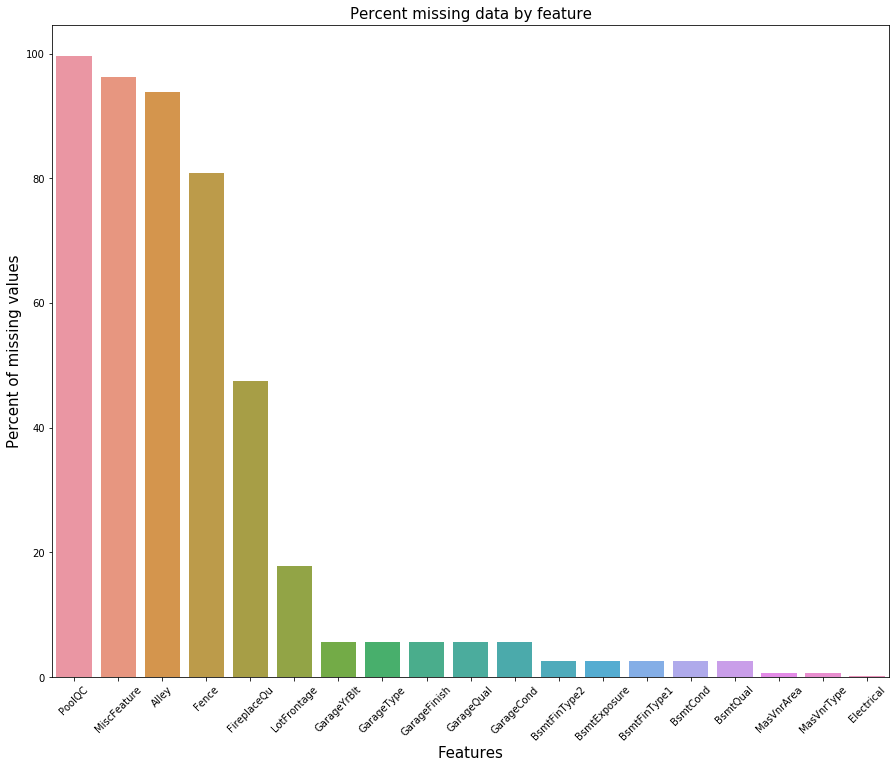

In [22]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='45')
sns.barplot(x = columns_missing.index, y = columns_missing)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

**Correlations**

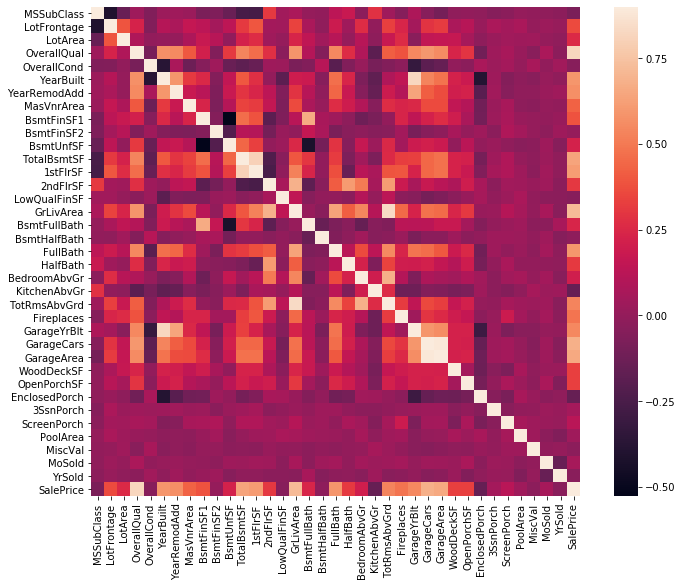

In [23]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

### Imputing missing values

In [24]:
missing.head(10)

,Missing ratio
PoolQC,99.656593
MiscFeature,96.291209
Alley,93.750000
Fence,80.769231
FireplaceQu,47.390110
LotFrontage,17.788462
GarageYrBlt,5.563187
GarageType,5.563187
GarageFinish,5.563187
GarageQual,5.563187


PoolQC. NA means no pool. We can't drop it

In [25]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

**MiscFeature**

In [26]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

**Alley**

In [27]:
all_data["Alley"] = all_data["Alley"].fillna("None")

In [28]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [29]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

**LotFrontage**

In [30]:
all_data.groupby('Neighborhood')['LotFrontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    65.153409
Gilbert    74.207207
IDOTRR     62.241379
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    90.076923
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.157895
Veenker    72.000000
Name: LotFrontage, dtype: float64

In [31]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:
                                                                                    x.fillna(x.median()))

In [32]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [33]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [34]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [35]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [36]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [37]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [38]:
all_data = all_data.drop(['Utilities'], axis=1)

In [39]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [40]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [41]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [42]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [43]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [44]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")


### MORE

In [45]:
all_data.select_dtypes(exclude='object').nunique().sort_values(ascending=False)

LotArea          1947
GrLivArea        1288
BsmtUnfSF        1134
1stFlrSF         1079
TotalBsmtSF      1054
BsmtFinSF1        988
2ndFlrSF          631
GarageArea        600
MasVnrArea        441
WoodDeckSF        379
BsmtFinSF2        272
OpenPorchSF       250
EnclosedPorch     183
LotFrontage       132
ScreenPorch       121
YearBuilt         118
GarageYrBlt       104
YearRemodAdd       61
MiscVal            38
LowQualFinSF       36
3SsnPorch          31
MSSubClass         16
TotRmsAbvGrd       14
PoolArea           12
MoSold             12
OverallQual        10
OverallCond         9
BedroomAbvGr        8
GarageCars          6
YrSold              5
Fireplaces          5
FullBath            5
BsmtFullBath        4
KitchenAbvGr        4
BsmtHalfBath        3
HalfBath            3
dtype: int64

In [46]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [47]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2915, 78)


In [48]:
# features
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']


In [49]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.932147
PoolArea,18.701829
LotArea,13.123758
LowQualFinSF,12.080315
3SsnPorch,11.368094
LandSlope,4.971350
KitchenAbvGr,4.298845
BsmtFinSF2,4.142863
EnclosedPorch,4.000796
ScreenPorch,3.943508


In [50]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


In [51]:
all_data = pd.get_dummies(all_data)
#it converts all str variable to dummies
print(all_data.shape)

(2915, 220)


## back

In [52]:
ntrain = train.shape[0]

In [53]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# Training

In [54]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC

In [55]:
n_folds=5

def rmsle_cv(model):
    kf= KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, Target, 
                                   scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## Models

### Gradient boosting

In [56]:
GBoost = GradientBoostingRegressor()

In [57]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1222 (0.0071)



### Lboosting

In [58]:
model_lgb = lgb.LGBMRegressor()

In [59]:
score = rmsle_cv(model_lgb)
print('LGBMR score: {:.4} +-{:.4f}'.format(score.mean(), score.std()))

LGBMR score: 0.1276 +-0.0053


In [60]:
model_xgb = xgb.XGBRegressor()
score = rmsle_cv(model_xgb)
print('LGBMR score: {:.4} +-{:.4f}'.format(score.mean(), score.std()))

LGBMR score: 0.1341 +-0.0055


### Elastic

In [61]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [62]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [63]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1112 (0.0074)



### Lasso

In [64]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [65]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1112 (0.0073)



## Stacking

In [66]:
from sklearn.ensemble import StackingRegressor

In [67]:
estimators = [
    ('lasso', lasso),
    ('Enet', ENet),
    ('Gboost', GBoost),
    ('LGB', model_lgb)
]

In [68]:
averaged_models = StackingRegressor(estimators=estimators)

In [69]:
score = rmsle_cv(averaged_models)

In [70]:
score.mean()

0.10941439334561001

In [71]:
from sklearn.metrics import mean_squared_error
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [72]:
averaged_models.fit(train.values, Target)

StackingRegressor(estimators=[('lasso',
                               Pipeline(steps=[('robustscaler', RobustScaler()),
                                               ('lasso',
                                                Lasso(alpha=0.0005,
                                                      random_state=1))])),
                              ('Enet',
                               Pipeline(steps=[('robustscaler', RobustScaler()),
                                               ('elasticnet',
                                                ElasticNet(alpha=0.0005,
                                                           l1_ratio=0.9,
                                                           random_state=3))])),
                              ('Gboost', GradientBoostingRegressor()),
                              ('LGB', LGBMRegressor())])

In [73]:
stacked_train_pred = averaged_models.predict(train.values)
stacked_pred = np.expm1(averaged_models.predict(test.values))

In [74]:
rmsle(Target, stacked_train_pred)

0.08727595162870766

## only XGB and LGBM

In [75]:
model_xgb.fit(train, Target)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(Target, xgb_train_pred))

0.011829790856808547


In [76]:
model_lgb.fit(train, Target)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(Target, lgb_train_pred))

0.04260822398635537


# ensemble

In [77]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [78]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)